## 作業

目標: 建立一深度學習模型預測客戶是否流失

- 問題一: 請將資料區分為訓練與測試資料集
- 問題二: 請將資料標準化
- 問題三: 使用Keras 建立深度學習模型預測客戶是否流失
- 問題四: 評估模型準確度
- 問題五: 請繪製ROC Curve, 並求出 AUC
- 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/fubondl/master/data/Churn_Modelling.csv', header = 0 )
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.select_dtypes('object').head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [5]:
len(df['Surname'].unique())

2932

In [7]:
len(df['Geography'].unique())

3

In [8]:
len(df['Gender'].unique())

2

In [9]:
df = df.iloc[:,3:]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
geo = pandas.get_dummies(df['Geography'])
del geo['Spain']
geo.head()

,France,Germany
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0


In [14]:
gender = pandas.get_dummies(df['Gender'])
gender.head()
del gender['Male']
gender.head()

,Female
0,1
1,1
2,1
3,1
4,1


In [16]:
df = pandas.concat([geo, gender, df], axis = 1)
del df['Gender']
del df['Geography']

In [17]:
df.head()

,France,Germany,Female,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,1,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,608,41,1,83807.86,1,0,1,112542.58,0
2,1,0,1,502,42,8,159660.80,3,1,0,113931.57,1
3,1,0,1,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,850,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   France           10000 non-null  uint8  
 1   Germany          10000 non-null  uint8  
 2   Female           10000 non-null  uint8  
 3   CreditScore      10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [20]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42 )

In [21]:
train_X.shape

(8000, 11)

In [22]:
test_X.shape

(2000, 11)

In [23]:
train_y.shape

(8000,)

In [24]:
test_y.shape

(2000,)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [27]:
train_X[0:3]

array([[ 1.00150113, -0.57946723, -0.91324755,  0.35649971, -0.6557859 ,
         0.34567966, -1.21847056,  0.80843615,  0.64920267,  0.97481699,
         1.36766974],
       [-0.99850112,  1.72572313, -0.91324755, -0.20389777,  0.29493847,
        -0.3483691 ,  0.69683765,  0.80843615,  0.64920267,  0.97481699,
         1.6612541 ],
       [-0.99850112, -0.57946723, -0.91324755, -0.96147213, -1.41636539,
        -0.69539349,  0.61862909, -0.91668767,  0.64920267, -1.02583358,
        -0.25280688]])

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation, Dense, Dropout

In [53]:
model = Sequential()
model.add(Dense(6, activation = 'relu', input_shape=(11,)))
model.add(Dropout(rate=0.1))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(1, activation= 'sigmoid'))

In [54]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_4 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_y,
                    batch_size = 32, 
                    epochs = 100,
                    validation_data = (test_X, test_y))

In [57]:
pred_y = (model.predict(test_X) > 0.5).flatten().astype(int)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, pred_y)

0.861

In [59]:
confusion_matrix(test_y, pred_y)

array([[1551,   56],
       [ 222,  171]])

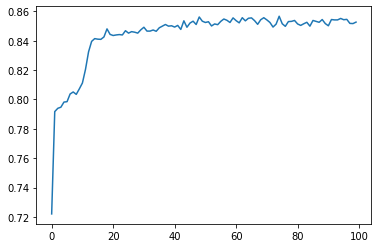

In [61]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))),history.history.get('accuracy'))

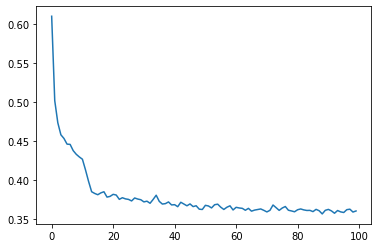

In [62]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))),history.history.get('loss'))

In [63]:
pred_y2 = model.predict(test_X).flatten()

In [65]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_y2)

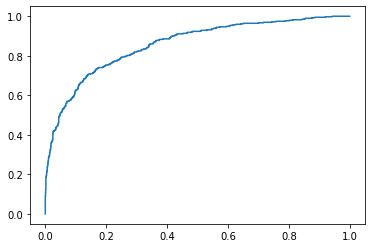

In [66]:
plt.plot(fpr, tpr)

In [68]:
auc(fpr, tpr)

0.8575491132149264

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability = True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

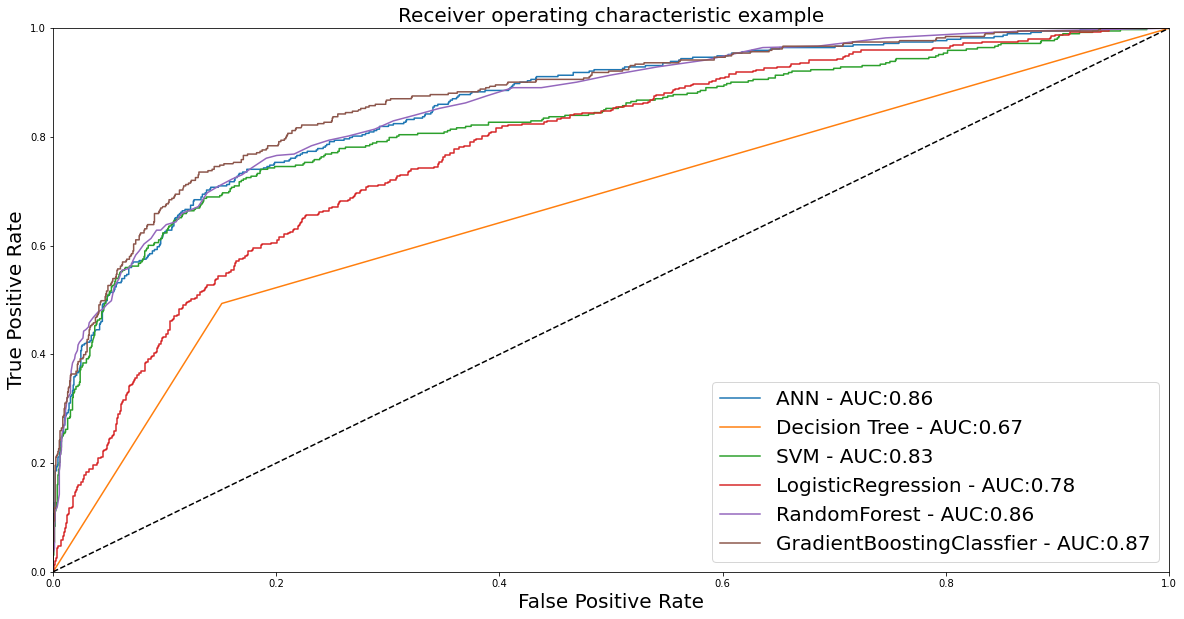

In [70]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])
for clf, title in zip([model,clf1,clf2,clf3, clf4, clf5], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest', 'GradientBoostingClassfier']):
    if title != 'ANN':
        probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    else:
        pred_y = clf.predict(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, pred_y)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()


In [78]:
from sklearn.preprocessing import StandardScaler
import numpy as np
a = np.array([50,60,70])
a.mean(), a.std()


(60.0, 8.16496580927726)

In [79]:
(a - a.mean()) / a.std()

array([-1.22474487,  0.        ,  1.22474487])

In [77]:
sc = StandardScaler()
sc.fit(a.reshape(-1,1))
sc.mean_, sc.var_

(array([60.]), array([66.66666667]))

In [80]:
sc.transform(a.reshape(-1,1))

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])